# Automated Exploratory Data Analysis tool and Dealing with many data at the same time and creating new custom data:

## User Prompt:

- Interactive user prompt is displayed where users can upload files of type CSV or Excel databases.


## Data Import:

- The specified files or Excel tables are imported and converted into a data structure suitable for analysis.
- The data structure is analyzed, and raw information about columns and rows is extracted.

## Split Columns:

- Columns are divided into numerical and categorical columns based on the type of data in each column.
- A list of the numeric and categorical columns available for selection is displayed.

## Detect Null Values:

- Allows the user to select the column in which they wish to detect null values.
- The null values in the selected column and simple statistics about them, such as their total number and percentage in the column, are displayed.

## Processing Options:

- Gives the user several options for dealing with null values, such as deleting the entire column, reducing the number of rows containing null values, or deleting entire null rows.
- The selected option is executed on the data, updating the structure as needed.

## Chart Display:

- After performing the previous steps, it allows the user to choose the column for which they want to display the graph.



## Tool Advantages:

- Dealing with many data at the same time and creating new custom data
- Facilitates the import and analysis of CSV or Excel files.
- Divides columns into numeric and categorical columns to specify the type of data.
- Provides an easy-to-use interface to select the required column to detect null values.
- Offers options to handle null values, such as deleting the column, reducing the number of rows, or deleting null rows.
- offer option to slice data and resize it to new data.
- Displays data visually through graphs suitable for the column type.


D:\@ old laptop\@a.CV & jobs\المبادرة\capstone\Capstone Automated Exploratory Data Analysis\International_Report_Departures.csv

In [ ]:
D:\@ old laptop\@a.CV & jobs\المبادرة\capstone\Capstone Automated Exploratory Data Analysis\International_Report_Passengers.csv

In [ ]:
D:\@ old laptop\@a.CV & jobs\المبادرة\capstone\Capstone Automated Exploratory Data Analysis\train.csv

In [23]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# List of allowed file extensions
extentions = ['.csv', '.xlsx']

# function to read data:
def read_data(data_path):
    """
    Reads data from a file based on its extension.

    Parameters:
        data_path (str): Path to the data file.

    Returns:
        df (pandas.DataFrame): Dataframe containing the read data.
    """
    if data_extension == '.csv':
        df = pd.read_csv(data_path)
    elif data_extension == '.xlsx':
        df = pd.read_excel(data_path)
    return df

# Entering and Reading Data:

# Dictionary to store the data
data_store = {}
while True:
    
    try : 
        # user to enter the path of the data file
        data_path = input('Enter path of your data!(Csv or Exel file), to close press Enter')
        
        # If the user presses Enter, exit the loop
        if data_path == '':
            break
            
        # Extract the file extension from the data path
        data_extension = os.path.splitext(data_path)[1]
        
        # Extract the data name from the data path
        data_name = data_path.split('\\')[-1].split('.')[0]
        
        if data_extension not in extentions:
            print('\n please, enter one of this extentions: (Csv or Exel file)')
        elif data_name in list(data_store.keys()) :
            print(f'\nthis data name ({data_name}) already exist, change the name!')
            
        else:
            # Read the data using the read_data function
            df = read_data(data_path)
            data_store[data_name] = df
            print(f'\n{list(data_store.keys())}')
            
            # to add more data
            print(f'\n({data_name}) has been read successfuly!, if want to add other data : ', end = ' ')
            
    except Exception as e:
        print(f"An error occurred: {e}")
            
# Print the final list of stored data names
print(f'\n{list(data_store.keys())}')

Enter path of your data!(Csv or Exel file), to close press EnterD:\@ old laptop\@a.CV & jobs\المبادرة\capstone\Capstone Automated Exploratory Data Analysis\International_Report_Departures.csv

['International_Report_Departures']

(International_Report_Departures) has been read successfuly!, if want to add other data :  Enter path of your data!(Csv or Exel file), to close press EnterD:\@ old laptop\@a.CV & jobs\المبادرة\capstone\Capstone Automated Exploratory Data Analysis\International_Report_Passengers.csv

['International_Report_Departures', 'International_Report_Passengers']

(International_Report_Passengers) has been read successfuly!, if want to add other data :  Enter path of your data!(Csv or Exel file), to close press EnterD:\@ old laptop\@a.CV & jobs\المبادرة\capstone\Capstone Automated Exploratory Data Analysis\train.csv

['International_Report_Departures', 'International_Report_Passengers', 'train']

(train) has been read successfuly!, if want to add other data :  Enter path

In [26]:
def show_column(columns_data, data_name):
    '''
        Parameters:
         - columns_data: list of columns to display
         - data_name: name of the data to display the columns from
        Description: Displays the specified columns of a given data.
    '''
    columns = list(data_store[data_name].columns)
    print(f'\n{", ".join(columns_data)}')
        
        
def show_data():
    '''
    Description: Displays the available data names and allows the user to select a data to display.
    '''
    while True:
        print(list(data_store.keys()))
        data_name = input('\nPlease, Enter the data name you want to show (to exit press enter) ')
        if data_name == '':
            break
        if data_name not in data_store.keys():
            print('\nthis data name does not exist! ')
        else:
            print(data_store[data_name])
            
def show_data_shape():
    '''
    Description: Displays the available data names and allows the user to select a data to 
    display its shape (number of rows and columns).
    '''
    while True:
        print(list(data_store.keys()))
        data_name = input('Please, Enter the data name you want to show its size (to exit press enter) ')
        if data_name == '':
            break
        if data_name not in data_store.keys():
            print('\nthis data name does not exist! ')
        else:
            print(f'\nnumber of {data_name} rows = {data_store[data_name].shape[0]}')
            print(f'number of {data_name} columns = {data_store[data_name].shape[1]}\n')
            
def Split_data_to_numerical_and_catagorical():
    '''
    Description: Displays the available data names and allows the user to select a data to split into numerical and
    categorical columns and save it to new data name with data_name_numerical_columns & data_name_categorical_columns .
    '''
    while True:
        print(list(data_store.keys()))
        data_name = input('Please, Enter the data name you want to split (to exit press enter) ')
        if data_name == '':
            break
        if data_name not in data_store.keys():
            print('\nthis data name does not exist! ')
        else:
            numerical_columns = data_store[data_name].select_dtypes(include=['int', 'float']).columns
            categorical_columns = data_store[data_name].select_dtypes(include=['object']).columns
            print(f'\nNumerical columns : ')
            show_column(numerical_columns, data_name)
            print(f'\nCategorical columns : ')
            show_column(categorical_columns, data_name)
            print()
            if 'numerical' not in data_name.split('_') and 'categorical' not in data_name.split('_'):
                data_store[f'{data_name}_numerical_columns'] = data_store[data_name][numerical_columns]
                data_store[f'{data_name}_categorical_columns'] = data_store[data_name][categorical_columns]
                print('\ndata has been splited to numerical and catagorical data and has been saved successfuly! ')

def Explore_null_values_in_columns():
    '''
     Description: Displays the available data names and allows the user to select a data to explore its null values
     and the percentage of each column null values.
    '''
    while True:
        print(list(data_store.keys()))
        data_name = input('\nPlease, Enter the data name you want to explore its null values (to exit press enter) ')
        if data_name == '':
            break
        if data_name not in data_store.keys():
            print('\nthis data name does not exist! ')
        else:
            columns = data_store[data_name].columns
            show_column(columns, data_name)
            while True:
                selected_column = input(f''' # choose the name of column you want to check 
        or enter (all) to check all columns ! to exit press Enter !''' )
                if not selected_column or len(columns) == 0:
                    break 
                if selected_column == 'all':
                    data_store[data_name].info()
                elif selected_column not in columns:
                    print(f'\nPlease, enter exist column! ')
                else:
                    missing_values = data_store[data_name][selected_column].isnull().sum()
                    total_values = data_store[data_name][selected_column].shape[0]
                    missing_percentage = (missing_values / total_values) * 100
                    print(f'\nmissing_values of {selected_column} = {missing_values}')
                    print(f'missing_percentage of {selected_column} = {missing_percentage : .2f} %\n')

def Drop_null_values():
    """
    Description: Displays the available data names and allows the user to Drops null values from a specified data
    in the data_store.
    """
    while True:
        print(list(data_store.keys()))
        data_name = input('\nPlease, Enter the data name you want to drop its null values (to exit press enter) ')
        if data_name == '':
            break
        if data_name not in data_store.keys():
            print('\nthis data name does not exist! ')
        else:
            if 'without' not in data_name.split('_') and 'nulls' not in data_name.split('_'):
                data_store[f'{data_name}_without_nulls'] = data_store[data_name].dropna()
                print(f'\nnull values has been deleted and has been saved to {data_name}_without_nulls.')
            else:
                data_store[f'{data_name}'] = data_store[data_name].dropna()
                print(f'\nnull values has been deleted and saved to {data_name}.')
                
def Drop_columns():
    """
    Description: Displays the available data names and allows the user to Drops columns from a specified
    data in the data_store.
    """
    while True:
        print(list(data_store.keys()))
        data_name = input('Please, Enter the data name you want to drop its columns (to exit press enter) ')
        if data_name == '':
            break
        if data_name not in data_store.keys():
            print('this data name does not exist! ')
        else:
            columns = list(data_store[data_name].columns)
            show_column(columns, data_name)
            while True:
                selected_column = input(f'\n# choose the name of column you want to drop! to exit press Enter! ')
                if not selected_column or len(columns) == 0:
                    break
                if selected_column not in columns:
                    print(f'\nPlease, enter exist column! ')
#                     show_column(columns, data_name)
                else:
                    new_name = input('deleting.... , enter the data new name to or press enter if you want to save changes to old data ')
                    if new_name == '':
                        data_store[data_name] = data_store[data_name].drop(selected_column, axis=1)
                    else:
                        data_store[new_name] = data_store[data_name].drop(selected_column, axis=1)
                        print(f'\nchanges has been saved to {new_name}')
                    print(f'\n{selected_column} has been deleted. \n')
                
def Slice_Data_Columns_and_rows():
    """
    Description: Displays the available data names and allows the user to Slices rows and columns of a
    specified data in the data_store.
    """
    while True:
        print(list(data_store.keys()))
        data_name = input('Please, Enter the data name you want to sclice (to exit press enter) ')
        if data_name == '':
            break
        if data_name not in data_store.keys():
            print('\nthis data name does not exist! ')
        else:
            
            while True:
                print(f'\nplease, enter range of rows you want to drop! start x : end y for rows and columns ex:[x:y, x:y] # press (z) to exit ')
                try : 
                    x1 = (input('please enter x for row value '))
                    print(f'x1 = {x1}')
                    if x1 == 'z':
                        break
                    y1 = (input('please enter y for row value '))
                    if y1 == 'z':
                        break
                    x2 = (input('please enter x for column value '))
                    if x2 == 'z':
                        break
                    y2 = (input('please enter y for column value '))
                    if y2 == 'z':
                        break
                    if x1 == '':
                        x1 = 0
                    if x2 == '':
                        x2 = 0
                    if y1 == '':
                        y1 = -1
                    else :
                        y1 = int(y1) + 1
                    if y2 == '':
                        y2 = -1
                    else :
                        y2 = int(y2) + 1

                    print(data_store[data_name].iloc[int(x1) : int(y1), int(x2) : int(y2)])
                    new_name = input('please, enter the data new name to save it or press enter if you want to skip ')
                    if new_name == '':
                        pass
                    else:
                        data_store[new_name] = data_store[data_name].iloc[int(x1) : int(y1), int(x2) : int(y2)]
                        print(f'\ndata has been saved to {new_name}')
                except Exception as e:
                    print(f"An error occurred: {e}")
    
def visualization():
    """
    Description: Displays the available data names and allows the user to Visualizes a specified column
    in a data from the data_store.
    """
    while True:
        print(list(data_store.keys()))
        data_name = input('Please, Enter the data name you want to visualize (to exit press enter) ')
        if data_name == '':
            break
        if data_name not in data_store.keys():
            print('\nthis data name does not exist! ')
        else:
            
            while True:
                print('\nchoose the column and the hue ')
                columns = list(data_store[data_name].columns)
                show_column(columns, data_name)
                column = input('Please, enter the name of column you want to visualize (to exit press enter) ')
                if column == '':
                    break             
                hue =  input('Please, enter the name hue (for no hue press enter) ')
                if hue == '':
                    hue = None
                    size_hue = 0              
                if column not in columns :
                    print(f'\nthis column name ({column}) dose not exist! \n')
                elif column not in columns and column != None:
                    print(f'\nthis hue name ({hue}) dose not exist! \n')
                else:
                    if hue != None:
                        size_hue = data_store[data_name][hue].value_counts().count()  
                    size_column = data_store[data_name][column].value_counts().count()
                    data = data_store[data_name]
                    if size_column > 100 or size_hue > 100 :
                        x = input('''selected columns data is very large it will take long time, 
    please, reduce data size. enter the size of data rows you want to reach > ex: 20 
    or slice data in option number (6) ''')        
                        data = data_store[data_name].head(int(x))
                    sns.countplot(x=column, hue=hue, data=data)
                    plt.pause(1)
                    plt.show()
    

------------------------------------------------------------

Operations We Have Of EDA :
0 - show Data
1 - Show data shape.
2 - Split data to numerical and catagorical.
3 - Explore null values in columns.
4 - Drop null values.
5 - Drop columns.
6 - Slice Data Columns & rows. 
7 - Visualize column.
8 - EXIT.

------------------------------------------------------------
Choose the number of operation you want!  0
['International_Report_Departures', 'International_Report_Passengers', 'train']

Please, Enter the data name you want to show (to exit press enter) train
     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890         

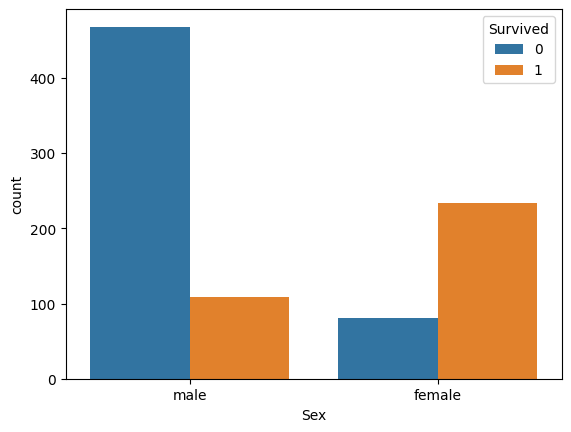


choose the column and the hue 

Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked
Please, enter the name of column you want to visualize (to exit press enter) 
['International_Report_Departures', 'International_Report_Passengers', 'train', 'train_numerical_columns', 'train_categorical_columns', 'train_without_nulls', 'new train data']
Please, Enter the data name you want to visualize (to exit press enter) 
------------------------------------------------------------

Operations We Have Of EDA :
0 - show Data
1 - Show data shape.
2 - Split data to numerical and catagorical.
3 - Explore null values in columns.
4 - Drop null values.
5 - Drop columns.
6 - Slice Data Columns & rows. 
7 - Visualize column.
8 - EXIT.

------------------------------------------------------------
Choose the number of operation you want!  8


In [27]:
# EDA Process:
def eda_process():
    
    '''The Function (eda_process) provides a menu with options for different EDA operations. It continuously 
       prompts the user to choose an operation until the user selects the "EXIT" option (option 8). Each option
       corresponds to a specific function that performs a particular EDA operation.'''
    
message = (
'''
Operations We Have Of EDA :
0 - show Data
1 - Show data shape.
2 - Split data to numerical and catagorical.
3 - Explore null values in columns.
4 - Drop null values.
5 - Drop columns.
6 - Slice Data Columns & rows. 
7 - Visualize column.
8 - EXIT.
'''                                            )
                            
while True:
    print('-' * 60)
    print(message)
    print('-' * 60)
    option = input(f'Choose the number of operation you want!  ')
    
    if option == '0':
        show_data()
        
    elif option == '1':
        show_data_shape()
        
    elif option == '2':
        Split_data_to_numerical_and_catagorical()
        
    elif option == '3':
        Explore_null_values_in_columns()
                
    elif option == '4':
        Drop_null_values()
         
    elif option == '5':
        Drop_columns()
        
    elif option == '6':
        Slice_Data_Columns_and_rows()
        
    elif option == '7':
        visualization()
        
    elif option == '8':
        break
    else:
        print('Please, enter exist option! ')